In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# This is the path to the folder within your Google Drive
drive_path = '/content/drive/MyDrive/EmotionRecognitionProject' # Changed to the local path after mounting

# List the files in the folder
files = os.listdir(drive_path)

# Print the list of files to check
for file in files:
    print(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
archive.zip
TESS Toronto emotional speech set data
tess toronto emotional speech set data
audio.wav
Recording.wav
new.wav
emotion_recognition_model.joblib


In [3]:
import zipfile

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/EmotionRecognitionProject/archive.zip'

# Path to extract the files
extracted_folder_path = '/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/'

# Create a folder to extract the files if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder_path)

# Print the list of extracted files
print("Extracted files:")
for file in extracted_files:
    print(file)



Extracted files:
TESS Toronto emotional speech set data
tess toronto emotional speech set data


In [4]:
# Check the contents of both extracted folders
folder1_path = '/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/TESS Toronto emotional speech set data'
folder2_path = '/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/tess toronto emotional speech set data'

# List files in the first folder
folder1_files = os.listdir(folder1_path)
print("Contents of 'TESS Toronto emotional speech set data':")
for file in folder1_files:
    print(file)

# List files in the second folder
folder2_files = os.listdir(folder2_path)
print("Contents of 'tess toronto emotional speech set data':")
for file in folder2_files:
    print(file)


Contents of 'TESS Toronto emotional speech set data':
OAF_Fear
OAF_Pleasant_surprise
OAF_Sad
OAF_angry
OAF_disgust
OAF_happy
OAF_neutral
YAF_angry
YAF_disgust
YAF_fear
YAF_happy
YAF_neutral
YAF_pleasant_surprised
YAF_sad
Contents of 'tess toronto emotional speech set data':
TESS Toronto emotional speech set data


In [5]:
# Path to one of the emotion folders
emotion_folder_path = '/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/TESS Toronto emotional speech set data/OAF_Fear'

# List the files in this emotion folder
emotion_files = os.listdir(emotion_folder_path)
print(f"Files in '{emotion_folder_path}':")
for file in emotion_files:
    print(file)



Files in '/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/TESS Toronto emotional speech set data/OAF_Fear':
OAF_back_fear.wav
OAF_bar_fear.wav
OAF_base_fear.wav
OAF_bath_fear.wav
OAF_bean_fear.wav
OAF_beg_fear.wav
OAF_bite_fear.wav
OAF_boat_fear.wav
OAF_bone_fear.wav
OAF_book_fear.wav
OAF_bought_fear.wav
OAF_burn_fear.wav
OAF_cab_fear.wav
OAF_calm_fear.wav
OAF_came_fear.wav
OAF_cause_fear.wav
OAF_chain_fear.wav
OAF_chair_fear.wav
OAF_chalk_fear.wav
OAF_chat_fear.wav
OAF_check_fear.wav
OAF_cheek_fear.wav
OAF_chief_fear.wav
OAF_choice_fear.wav
OAF_cool_fear.wav
OAF_dab_fear.wav
OAF_date_fear.wav
OAF_dead_fear.wav
OAF_death_fear.wav
OAF_deep_fear.wav
OAF_dime_fear.wav
OAF_dip_fear.wav
OAF_ditch_fear.wav
OAF_dodge_fear.wav
OAF_dog_fear.wav
OAF_doll_fear.wav
OAF_door_fear.wav
OAF_fail_fear.wav
OAF_fall_fear.wav
OAF_far_fear.wav
OAF_fat_fear.wav
OAF_fit_fear.wav
OAF_five_fear.wav
OAF_food_fear.wav
OAF_gap_fear.wav
OAF_gas_fear.wav
OAF_gaze_fear.wav
OAF_germ_fear.wav
OAF_get_f

In [ ]:
!pip install librosa numpy


In [6]:
import librosa
import numpy as np
import os

# Function to extract MFCCs from an audio file
def extract_mfcc(file_path):
    # Load the audio file with librosa
    audio, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs from the audio signal
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Take the mean of each MFCC feature across time frames
    mfccs = np.mean(mfccs.T, axis=0)

    return mfccs

# Path to the emotion folder (change as needed)
emotion_folder_path = '/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/TESS Toronto emotional speech set data/OAF_Fear'

# List all audio files in the folder
emotion_files = os.listdir(emotion_folder_path)

# Extract MFCCs for all audio files in the folder
features = []
labels = []

for file in emotion_files:
    if file.endswith('.wav'):  # Check if the file is an audio file
        file_path = os.path.join(emotion_folder_path, file)
        mfccs = extract_mfcc(file_path)
        features.append(mfccs)
        labels.append('Fear')  # The label is 'Fear' for this folder

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

print("Extracted MFCCs features shape:", features.shape)


Extracted MFCCs features shape: (200, 13)


In [8]:
# Define the emotion folders and their corresponding labels
emotion_folders = [
    ('OAF_Fear', 'Fear'),
    ('OAF_Pleasant_surprise', 'Pleasant_surprise'),
    ('OAF_Sad', 'Sad'),
    ('OAF_angry', 'Angry'),
    ('OAF_disgust', 'Disgust'),
    ('OAF_happy', 'Happy'),
    ('OAF_neutral', 'Neutral'),
    ('YAF_angry', 'Angry'),
    ('YAF_disgust', 'Disgust'),
    ('YAF_fear', 'Fear'),
    ('YAF_happy', 'Happy'),
    ('YAF_neutral', 'Neutral'),
    ('YAF_pleasant_surprised', 'Pleasant_surprise'),
    ('YAF_sad', 'Sad')
]

# Initialize empty lists to store the features and labels
all_features = []
all_labels = []

# Loop through each emotion folder and extract features
for folder, label in emotion_folders:
    folder_path = os.path.join('/content/drive/MyDrive/EmotionRecognitionProject/ExctractedData/TESS Toronto emotional speech set data', folder)
    emotion_files = os.listdir(folder_path)

    for file in emotion_files:
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            mfccs = extract_mfcc(file_path)
            all_features.append(mfccs)
            all_labels.append(label)

# Convert features and labels to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

print("Total features shape:", all_features.shape)
print("Total labels shape:", all_labels.shape)


Total features shape: (2800, 13)
Total labels shape: (2800,)


<ipython-input-9-93a3a5ac6982>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=all_labels, palette='viridis')


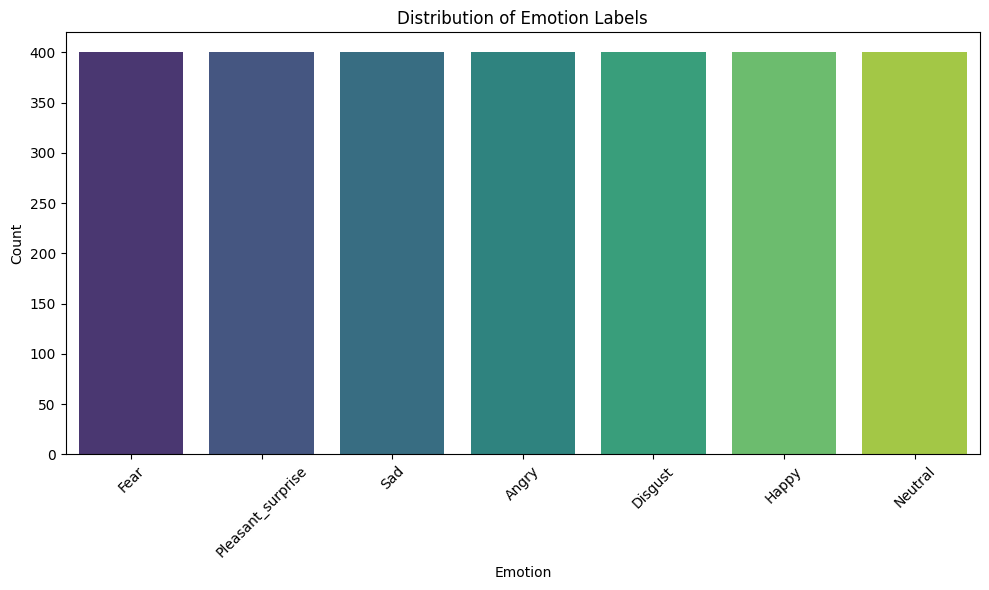

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of emotion labels
plt.figure(figsize=(10, 6))
sns.countplot(x=all_labels, palette='viridis')
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training features shape: (2240, 13)
Test features shape: (560, 13)
Training labels shape: (2240,)
Test labels shape: (560,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model with training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", int(accuracy * 100))

# Calculate precision, recall, and F1-score for the model's predicted class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Classification Report:")
print(f"  Precision: {int(precision * 100)}")
print(f"  Recall: {int(recall * 100)}")
print(f"  F1-score: {int(f1_score * 100)}")

Accuracy of the model: 77
Classification Report:
  Precision: 77
  Recall: 77
  F1-score: 77


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import joblib

# Save the trained model to a file
joblib.dump(model, '/content/drive/MyDrive/EmotionRecognitionProject/emotion_recognition_model.joblib')


['/content/drive/MyDrive/EmotionRecognitionProject/emotion_recognition_model.joblib']

In [13]:
import joblib

# Load the trained model from the file
loaded_model = joblib.load('/content/drive/MyDrive/EmotionRecognitionProject/emotion_recognition_model.joblib')


In [14]:
import librosa
import numpy as np
import joblib  # Use joblib or pickle, depending on what you used for saving

# Load the model
model_path = '/content/drive/MyDrive/EmotionRecognitionProject/emotion_recognition_model.joblib'
model = joblib.load(model_path)

# Path to the audio file you want to test
audio_path = '/content/drive/MyDrive/EmotionRecognitionProject/new.wav'

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)

# Extract MFCC features from the audio
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCC features
mfcc_scaled = np.mean(mfcc.T, axis=0)  # Take the mean of the MFCC features across time frames

# Make the prediction
sample_data = [mfcc_scaled]  # The model expects a 2D array, so we pass it as a list
prediction = model.predict(sample_data)

# Print the predicted emotion
print(f"Predicted emotion: {prediction[0]}")  # Output the emotion predicted by the model


Predicted emotion: Angry
